Objectives

1.	Apply various classification algorithms to the movie reviews dataset
2.	Use k-fold cross validation to identify the parameters that optimize performance (generalization) for each method
3.	Compare the accuracy and explainability of each method



Problem #1
For this homework, you will apply the following classification methods to the movie reviews classification data (available in Blackboard)
1.	KNN (vary the distance measure and K)
2.	Multinomial Naïve Bayes
3.	Random Forest
4.	Gradient Boosted Regression Trees

•	Apply 4-fold cross-validation to the provided training data subset to train your classifiers and identify their optimal parameters. 
•	You need to apply each algorithm to the original data and to the data normalized using at least 2 different methods. For each algorithm identify the best normalization (or no normalization) and justify your choice.

•	After fixing the classifiers’ parameters, apply each method to the provided testing data subset to predict and analyze your results. Compare the accuracy obtained during training (average of the cross-validation folds) to those of the test data and comment on the results (overfitting, underfitting, etc.) 
•	Analyze the results of each method by inspecting the feature importance (if applicable) and few misclassified samples.
•	Select the best algorithm and justify your choice based on accuracy, explainability, time required to train/test, etc.


In [3]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score,  classification_report

In [4]:
X_train = pd.read_csv('~/Desktop/Machine_Learning/IMDB dataset/X_train.csv')
X_test = pd.read_csv('~/Desktop/Machine_Learning/IMDB dataset/X_test.csv')
y_train = pd.read_csv('~/Desktop/Machine_Learning/IMDB dataset/y_train.csv').values.ravel()
y_test = pd.read_csv('~/Desktop/Machine_Learning/IMDB dataset/y_test.csv').values.ravel()

In [5]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (24999, 1000)
X_test shape: (24999, 1000)
y_train shape: (24999,)
y_test shape: (24999,)


In [6]:
print(X_train.head())

   0.0  1.0  1.0.1  0.0.1  1.0.2  1.0.3  1.0.4  1.0.5  1.0.6  1.0.7  ...  \
0  0.0  1.0    1.0    0.0    1.0    1.0    1.0    1.0    1.0    1.0  ...   
1  0.0  1.0    1.0    0.0    1.0    0.0    1.0    1.0    1.0    1.0  ...   
2  0.0  1.0    1.0    0.0    1.0    1.0    1.0    1.0    1.0    1.0  ...   
3  0.0  1.0    1.0    0.0    1.0    1.0    1.0    1.0    1.0    0.0  ...   
4  0.0  1.0    1.0    0.0    1.0    0.0    0.0    0.0    1.0    0.0  ...   

   0.0.893  0.0.894  0.0.895  0.0.896  0.0.897  0.0.898  0.0.899  0.0.900  \
0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

   0.0.901  0.0.902  
0      0.0      0.0  
1      0.0      0.0  
2      0.0    

In [7]:
print(y_train[:5])

[0. 0. 1. 0. 0.]


In [8]:
kf = KFold(n_splits=4, shuffle=True, random_state=42)

KNN (vary the distance measure and K)

In [9]:
k_values = [1, 3, 5, 7, 9]

In [10]:
all_fold_accuracies = {}  
avg_accuracies = []
execution_times = []


In [11]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    fold_accuracies = []
    
    start_time = time.time() 
    
    
    for train_index, val_index in kf.split(X_train):
        X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
       
        y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]
        
       
        knn.fit(X_fold_train, y_fold_train)
        y_pred = knn.predict(X_fold_val)
        accuracy = accuracy_score(y_fold_val, y_pred)
        fold_accuracies.append(accuracy) 
    
    avg_accuracy = sum(fold_accuracies) / len(fold_accuracies)  
    avg_accuracies.append(avg_accuracy)  
    
    elapsed_time = time.time() - start_time  
    execution_times.append(elapsed_time)  
    
    all_fold_accuracies[k] = fold_accuracies 

    
    print(f"KNN with K={k}: Average CV accuracy = {avg_accuracy:.4f}, Time taken = {elapsed_time:.2f} seconds")


KNN with K=1: Average CV accuracy = 0.5949, Time taken = 5.77 seconds
KNN with K=3: Average CV accuracy = 0.6205, Time taken = 5.46 seconds
KNN with K=5: Average CV accuracy = 0.6292, Time taken = 5.56 seconds
KNN with K=7: Average CV accuracy = 0.6352, Time taken = 5.59 seconds
KNN with K=9: Average CV accuracy = 0.6344, Time taken = 5.70 seconds


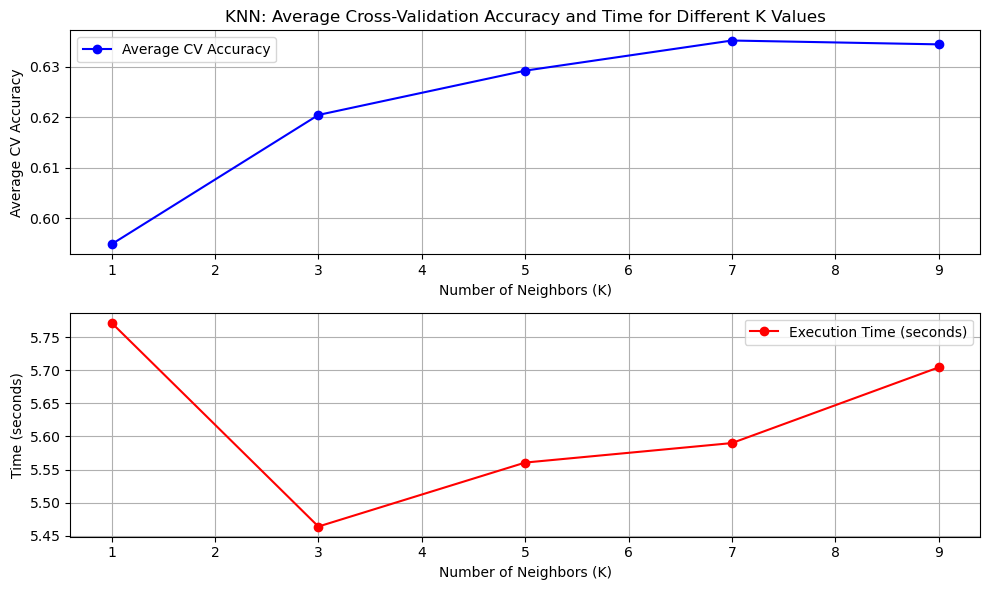

In [12]:
plt.figure(figsize=(10, 6))


plt.subplot(2, 1, 1)
plt.plot(k_values, avg_accuracies, marker='o', linestyle='-', color='b', label='Average CV Accuracy')
plt.title('KNN: Average Cross-Validation Accuracy and Time for Different K Values')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Average CV Accuracy')
plt.grid(True)
plt.legend()


plt.subplot(2, 1, 2)
plt.plot(k_values, execution_times, marker='o', linestyle='-', color='r', label='Execution Time (seconds)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()






KNN with K=1: Average CV accuracy = 0.5949, Average Training accuracy = 1.0000, Time taken = 21.46 seconds
KNN with K=3: Average CV accuracy = 0.6205, Average Training accuracy = 0.8068, Time taken = 23.49 seconds
KNN with K=5: Average CV accuracy = 0.6292, Average Training accuracy = 0.7601, Time taken = 24.66 seconds
KNN with K=7: Average CV accuracy = 0.6352, Average Training accuracy = 0.7367, Time taken = 24.19 seconds
KNN with K=9: Average CV accuracy = 0.6344, Average Training accuracy = 0.7186, Time taken = 24.45 seconds


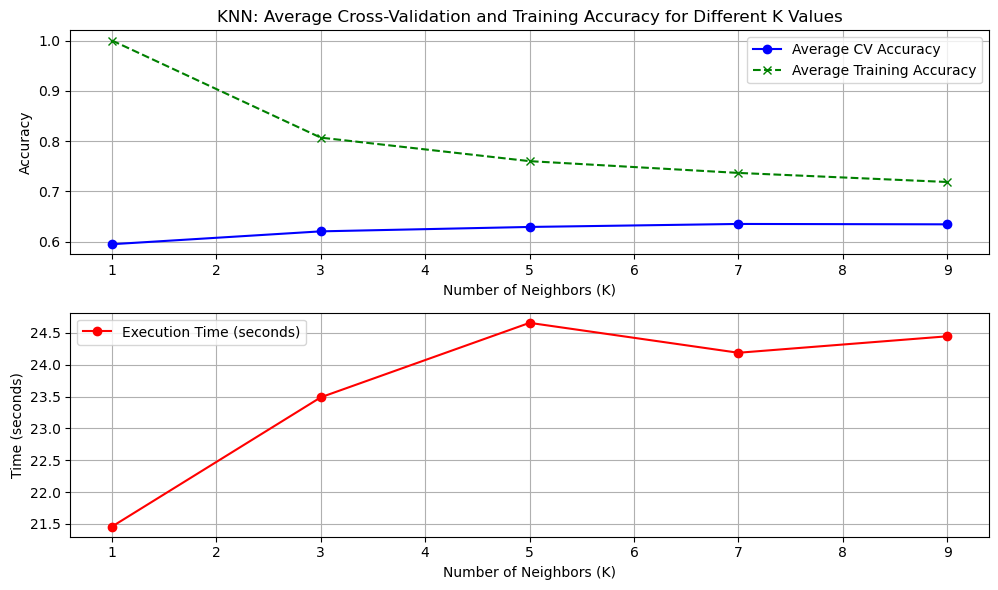

In [13]:
k_values = [1, 3, 5, 7, 9]
all_fold_accuracies = {}  
all_train_accuracies = {}
avg_accuracies = []
avg_train_accuracies = []
execution_times = []

kf = KFold(n_splits=4, shuffle=True, random_state=42)


for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    fold_accuracies = []
    fold_train_accuracies = []  
    
    start_time = time.time()  
    
    
    for train_index, val_index in kf.split(X_train):
        X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
        y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]
        
       
        knn.fit(X_fold_train, y_fold_train)
        
       
        y_val_pred = knn.predict(X_fold_val)
        accuracy = accuracy_score(y_fold_val, y_val_pred)
        fold_accuracies.append(accuracy)  
        
       
        y_train_pred = knn.predict(X_fold_train)
        train_accuracy = accuracy_score(y_fold_train, y_train_pred)
        fold_train_accuracies.append(train_accuracy)  
    
    avg_accuracy = sum(fold_accuracies) / len(fold_accuracies)  
    avg_train_accuracy = sum(fold_train_accuracies) / len(fold_train_accuracies)  
    avg_accuracies.append(avg_accuracy) 
    avg_train_accuracies.append(avg_train_accuracy)  
    
    elapsed_time = time.time() - start_time  
    execution_times.append(elapsed_time) 

    all_fold_accuracies[k] = fold_accuracies  
    all_train_accuracies[k] = fold_train_accuracies  


    print(f"KNN with K={k}: Average CV accuracy = {avg_accuracy:.4f}, Average Training accuracy = {avg_train_accuracy:.4f}, Time taken = {elapsed_time:.2f} seconds")





plt.figure(figsize=(10, 6))


plt.subplot(2, 1, 1)
plt.plot(k_values, avg_accuracies, marker='o', linestyle='-', color='b', label='Average CV Accuracy')
plt.plot(k_values, avg_train_accuracies, marker='x', linestyle='--', color='g', label='Average Training Accuracy')
plt.title('KNN: Average Cross-Validation and Training Accuracy for Different K Values')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()


plt.subplot(2, 1, 2)
plt.plot(k_values, execution_times, marker='o', linestyle='-', color='r', label='Execution Time (seconds)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()










KNN with K=1, Metric=euclidean: Average CV accuracy = 0.5949, Average Training accuracy = 1.0000, Time taken = 24.38 seconds
KNN with K=3, Metric=euclidean: Average CV accuracy = 0.6205, Average Training accuracy = 0.8068, Time taken = 24.84 seconds
KNN with K=5, Metric=euclidean: Average CV accuracy = 0.6292, Average Training accuracy = 0.7601, Time taken = 25.49 seconds
KNN with K=7, Metric=euclidean: Average CV accuracy = 0.6352, Average Training accuracy = 0.7367, Time taken = 26.51 seconds
KNN with K=9, Metric=euclidean: Average CV accuracy = 0.6344, Average Training accuracy = 0.7186, Time taken = 25.55 seconds


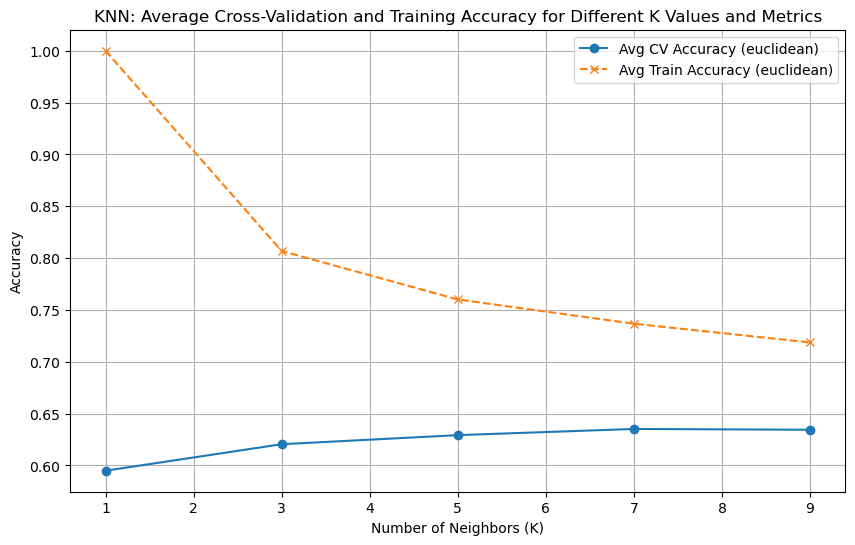

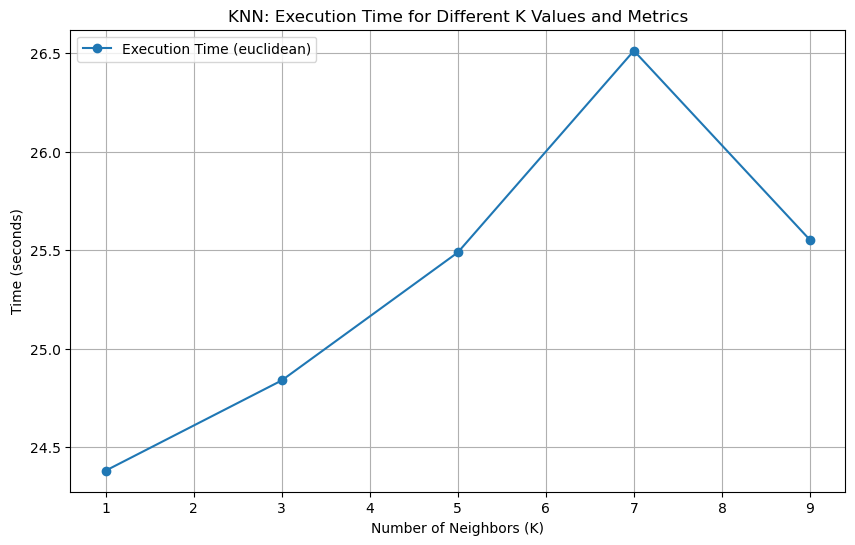

In [14]:
k_values = [1, 3, 5, 7, 9]
metrics = ['euclidean']  
all_results = {}

kf = KFold(n_splits=4, shuffle=True, random_state=42)

for metric in metrics:
    avg_accuracies = []
    avg_train_accuracies = []
    execution_times = []  

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric, n_jobs=-1)  
        fold_accuracies = []
        fold_train_accuracies = []

        start_time = time.time() 

        for train_index, val_index in kf.split(X_train):
            X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
            y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]
            
            knn.fit(X_fold_train, y_fold_train)
            y_val_pred = knn.predict(X_fold_val)
            accuracy = accuracy_score(y_fold_val, y_val_pred)
            fold_accuracies.append(accuracy)
            
            y_train_pred = knn.predict(X_fold_train)
            train_accuracy = accuracy_score(y_fold_train, y_train_pred)
            fold_train_accuracies.append(train_accuracy)
        
        avg_accuracy = sum(fold_accuracies) / len(fold_accuracies)
        avg_train_accuracy = sum(fold_train_accuracies) / len(fold_train_accuracies)
        avg_accuracies.append(avg_accuracy)
        avg_train_accuracies.append(avg_train_accuracy)

        execution_time = time.time() - start_time  
        execution_times.append(execution_time) 

        print(f"KNN with K={k}, Metric={metric}: Average CV accuracy = {avg_accuracy:.4f}, Average Training accuracy = {avg_train_accuracy:.4f}, Time taken = {execution_time:.2f} seconds")

    all_results[metric] = {
        'avg_accuracies': avg_accuracies,
        'avg_train_accuracies': avg_train_accuracies,
        'execution_times': execution_times 
    }


plt.figure(figsize=(10, 6))

for metric in metrics:
    plt.plot(k_values, all_results[metric]['avg_accuracies'], marker='o', linestyle='-', label=f'Avg CV Accuracy ({metric})')
    plt.plot(k_values, all_results[metric]['avg_train_accuracies'], marker='x', linestyle='--', label=f'Avg Train Accuracy ({metric})')

plt.title('KNN: Average Cross-Validation and Training Accuracy for Different K Values and Metrics')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(k_values, all_results[metric]['execution_times'], marker='o', linestyle='-', label=f'Execution Time ({metric})')
plt.title('KNN: Execution Time for Different K Values and Metrics')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.legend()
plt.show()

In [15]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [16]:
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()


X_train_minmax = minmax_scaler.fit_transform(X_train.values)  
X_train_standard = standard_scaler.fit_transform(X_train.values)  

In [17]:
k_values = [1, 3, 5, 7, 9]
metrics = ['euclidean']  
all_results = {}


kf = KFold(n_splits=4, shuffle=True, random_state=42)

def evaluate_knn(X, y):
    for metric in metrics:
        avg_accuracies = []
        avg_train_accuracies = []

        for k in k_values:
            knn = KNeighborsClassifier(n_neighbors=k, metric=metric, n_jobs=-1)
            fold_accuracies = []
            fold_train_accuracies = []

            for train_index, val_index in kf.split(X):
                X_fold_train, X_fold_val = X[train_index], X[val_index]
                y_fold_train, y_fold_val = y[train_index], y[val_index]
                
                knn.fit(X_fold_train, y_fold_train)
                y_val_pred = knn.predict(X_fold_val)
                accuracy = accuracy_score(y_fold_val, y_val_pred)
                fold_accuracies.append(accuracy)
                
                y_train_pred = knn.predict(X_fold_train)
                train_accuracy = accuracy_score(y_fold_train, y_train_pred)
                fold_train_accuracies.append(train_accuracy)

            avg_accuracy = sum(fold_accuracies) / len(fold_accuracies)
            avg_train_accuracy = sum(fold_train_accuracies) / len(fold_train_accuracies)
            avg_accuracies.append(avg_accuracy)
            avg_train_accuracies.append(avg_train_accuracy)

            print(f"KNN with K={k}, Metric={metric}: Average CV accuracy = {avg_accuracy:.4f}, Average Training accuracy = {avg_train_accuracy:.4f}")

        all_results[metric] = {
            'avg_accuracies': avg_accuracies,
            'avg_train_accuracies': avg_train_accuracies,
        }


X_train_minmax = minmax_scaler.fit_transform(X_train.values)
X_train_standard = standard_scaler.fit_transform(X_train.values)


print("Results for unscaled data:")
evaluate_knn(X_train.values, y_train)

print("\nResults for Min-Max scaled data:")
evaluate_knn(X_train_minmax, y_train)

print("\nResults for Standardized data:")
evaluate_knn(X_train_standard, y_train)


Results for unscaled data:
KNN with K=1, Metric=euclidean: Average CV accuracy = 0.5949, Average Training accuracy = 1.0000
KNN with K=3, Metric=euclidean: Average CV accuracy = 0.6205, Average Training accuracy = 0.8068
KNN with K=5, Metric=euclidean: Average CV accuracy = 0.6292, Average Training accuracy = 0.7601
KNN with K=7, Metric=euclidean: Average CV accuracy = 0.6352, Average Training accuracy = 0.7367
KNN with K=9, Metric=euclidean: Average CV accuracy = 0.6344, Average Training accuracy = 0.7186

Results for Min-Max scaled data:
KNN with K=1, Metric=euclidean: Average CV accuracy = 0.5949, Average Training accuracy = 1.0000
KNN with K=3, Metric=euclidean: Average CV accuracy = 0.6205, Average Training accuracy = 0.8068
KNN with K=5, Metric=euclidean: Average CV accuracy = 0.6292, Average Training accuracy = 0.7601
KNN with K=7, Metric=euclidean: Average CV accuracy = 0.6352, Average Training accuracy = 0.7367
KNN with K=9, Metric=euclidean: Average CV accuracy = 0.6344, Aver

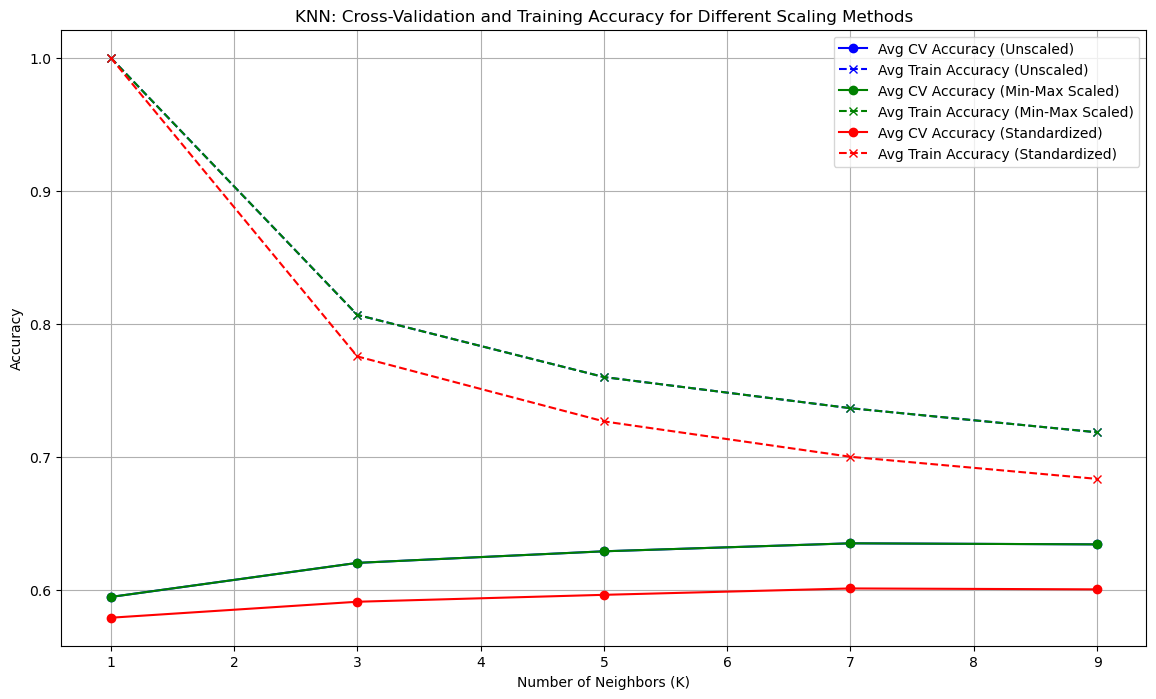

In [18]:
k_values = [1, 3, 5, 7, 9]

results = {
    'Unscaled': {
        'avg_cv_accuracy': [0.5949, 0.6205, 0.6292, 0.6352, 0.6344],
        'avg_train_accuracy': [1.0000, 0.8068, 0.7601, 0.7367, 0.7186]
    },
    'Min-Max Scaled': {
        'avg_cv_accuracy': [0.5949, 0.6205, 0.6292, 0.6352, 0.6344],
        'avg_train_accuracy': [1.0000, 0.8068, 0.7601, 0.7367, 0.7186]
    },
    'Standardized': {
        'avg_cv_accuracy': [0.5793, 0.5913, 0.5965, 0.6013, 0.6006],
        'avg_train_accuracy': [1.0000, 0.7756, 0.7268, 0.7002, 0.6836]
    }
}


plt.figure(figsize=(14, 8))

plt.plot(k_values, results['Unscaled']['avg_cv_accuracy'], marker='o', linestyle='-', color='b', label='Avg CV Accuracy (Unscaled)')
plt.plot(k_values, results['Unscaled']['avg_train_accuracy'], marker='x', linestyle='--', color='b', label='Avg Train Accuracy (Unscaled)')

plt.plot(k_values, results['Min-Max Scaled']['avg_cv_accuracy'], marker='o', linestyle='-', color='g', label='Avg CV Accuracy (Min-Max Scaled)')
plt.plot(k_values, results['Min-Max Scaled']['avg_train_accuracy'], marker='x', linestyle='--', color='g', label='Avg Train Accuracy (Min-Max Scaled)')

plt.plot(k_values, results['Standardized']['avg_cv_accuracy'], marker='o', linestyle='-', color='r', label='Avg CV Accuracy (Standardized)')
plt.plot(k_values, results['Standardized']['avg_train_accuracy'], marker='x', linestyle='--', color='r', label='Avg Train Accuracy (Standardized)')

plt.title('KNN: Cross-Validation and Training Accuracy for Different Scaling Methods')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

Multinomial Naïve Bayes

Evaluating Multinomial Naive Bayes with unscaled data:
Multinomial Naive Bayes with alpha=0.01: Average CV accuracy = 0.8323, Training accuracy = 0.8357, Time taken = 0.48 seconds
Multinomial Naive Bayes with alpha=0.1: Average CV accuracy = 0.8323, Training accuracy = 0.8357, Time taken = 0.42 seconds
Multinomial Naive Bayes with alpha=1: Average CV accuracy = 0.8322, Training accuracy = 0.8357, Time taken = 0.41 seconds
Multinomial Naive Bayes with alpha=10: Average CV accuracy = 0.8323, Training accuracy = 0.8355, Time taken = 0.41 seconds
Multinomial Naive Bayes with alpha=100: Average CV accuracy = 0.8295, Training accuracy = 0.8342, Time taken = 0.44 seconds


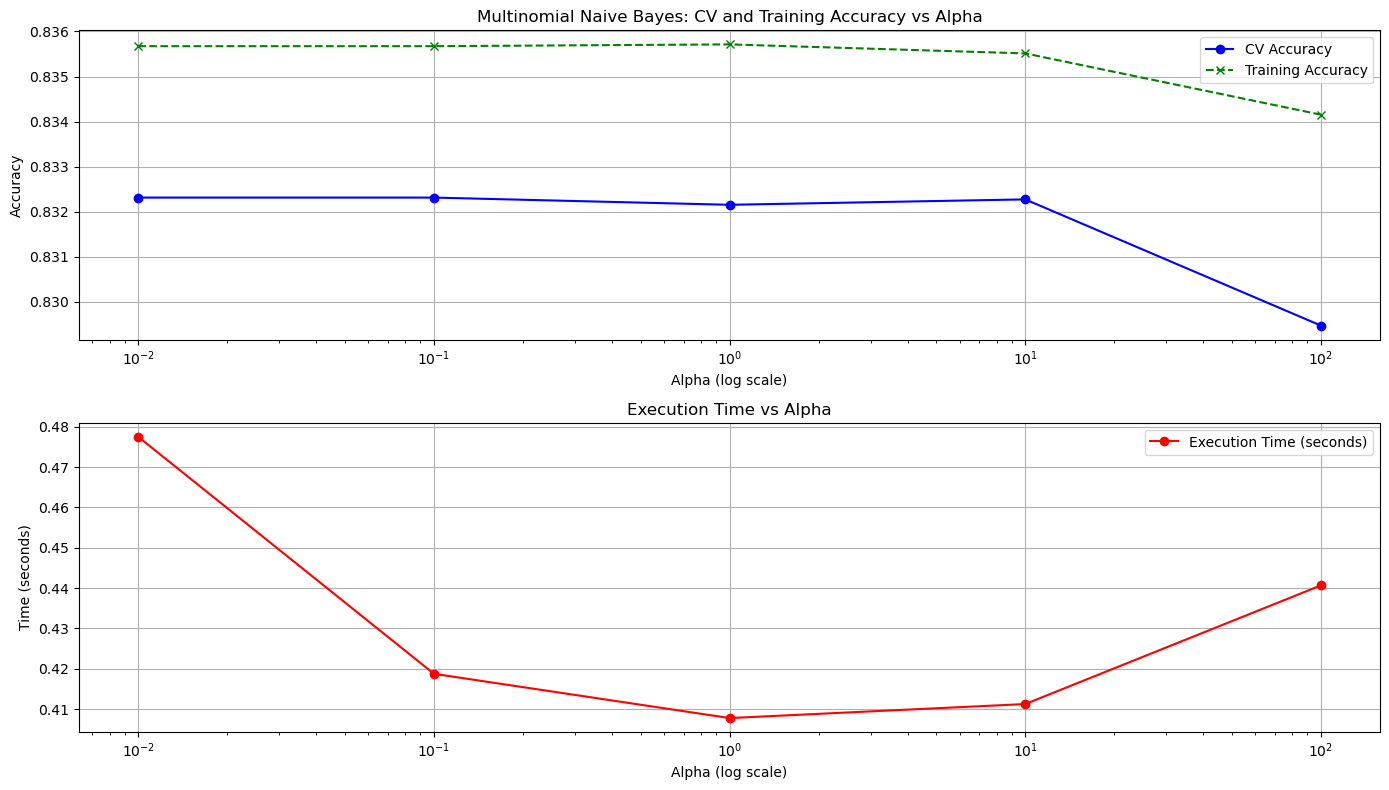

In [19]:
alpha_values = [0.01, 0.1, 1, 10, 100]
kf = KFold(n_splits=4, shuffle=True, random_state=42)


results = {
    'alpha': alpha_values,
    'cv_accuracy': [],
    'train_accuracy': [],
    'execution_time': []
}


def evaluate_mnb(X, y, alpha_values):
    for alpha in alpha_values:
        mnb = MultinomialNB(alpha=alpha)
        
    
        start_time = time.time()
        
     
        cv_scores = cross_val_score(mnb, X, y, cv=kf, scoring='accuracy')
        
       
        elapsed_time = time.time() - start_time
        
        avg_cv_accuracy = np.mean(cv_scores)  
        

        mnb.fit(X, y)
        train_accuracy = mnb.score(X, y)

      
        results['cv_accuracy'].append(avg_cv_accuracy)
        results['train_accuracy'].append(train_accuracy)
        results['execution_time'].append(elapsed_time)

        print(f"Multinomial Naive Bayes with alpha={alpha}: "
              f"Average CV accuracy = {avg_cv_accuracy:.4f}, "
              f"Training accuracy = {train_accuracy:.4f}, "
              f"Time taken = {elapsed_time:.2f} seconds")


print("Evaluating Multinomial Naive Bayes with unscaled data:")
evaluate_mnb(X_train.values, y_train, alpha_values)


plt.figure(figsize=(14, 8))


plt.subplot(2, 1, 1)
plt.plot(results['alpha'], results['cv_accuracy'], marker='o', linestyle='-', color='b', label='CV Accuracy')
plt.plot(results['alpha'], results['train_accuracy'], marker='x', linestyle='--', color='g', label='Training Accuracy')
plt.xscale('log')
plt.title('Multinomial Naive Bayes: CV and Training Accuracy vs Alpha')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()


plt.subplot(2, 1, 2)
plt.plot(results['alpha'], results['execution_time'], marker='o', linestyle='-', color='r', label='Execution Time (seconds)')
plt.xscale('log')
plt.title('Execution Time vs Alpha')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

Evaluating Multinomial Naive Bayes with unscaled data:
Multinomial Naive Bayes with alpha=0.01: Average CV accuracy = 0.8323, Training accuracy = 0.8357, Time taken = 0.41 seconds
Multinomial Naive Bayes with alpha=0.1: Average CV accuracy = 0.8323, Training accuracy = 0.8357, Time taken = 0.40 seconds
Multinomial Naive Bayes with alpha=1: Average CV accuracy = 0.8322, Training accuracy = 0.8357, Time taken = 0.39 seconds
Multinomial Naive Bayes with alpha=10: Average CV accuracy = 0.8323, Training accuracy = 0.8355, Time taken = 0.40 seconds
Multinomial Naive Bayes with alpha=100: Average CV accuracy = 0.8295, Training accuracy = 0.8342, Time taken = 0.43 seconds
Evaluating Multinomial Naive Bayes with Min-Max scaled data:
Multinomial Naive Bayes with alpha=0.01: Average CV accuracy = 0.8322, Training accuracy = 0.8355, Time taken = 0.42 seconds
Multinomial Naive Bayes with alpha=0.1: Average CV accuracy = 0.8322, Training accuracy = 0.8355, Time taken = 0.59 seconds
Multinomial Naive

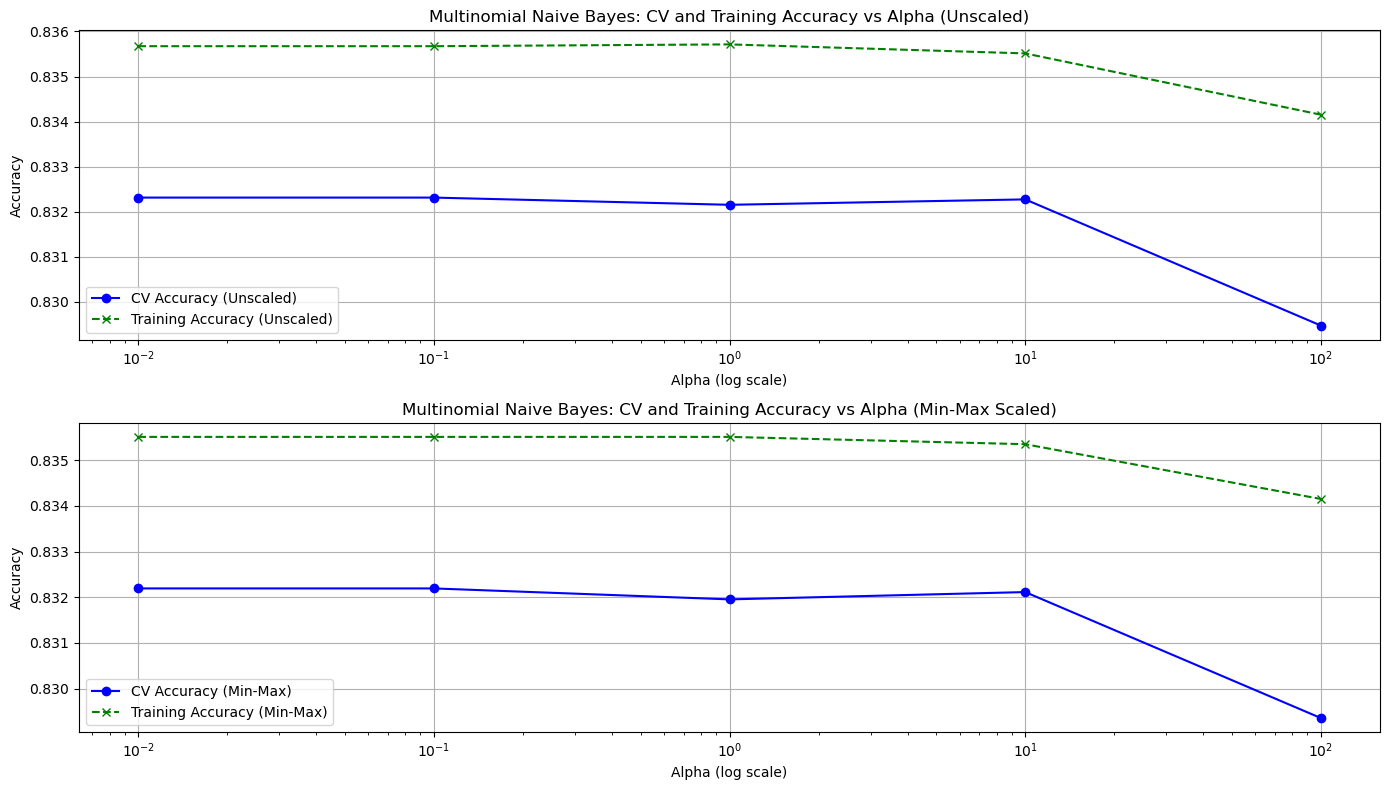

In [20]:

minmax_scaler = MinMaxScaler()


alpha_values = [0.01, 0.1, 1, 10, 100]
kf = KFold(n_splits=4, shuffle=True, random_state=42)

def evaluate_mnb(X, y, alpha_values):
    results = {
        'alpha': alpha_values,
        'cv_accuracy': [],
        'train_accuracy': [],
        'execution_time': []
    }

    for alpha in alpha_values:
        mnb = MultinomialNB(alpha=alpha)

        start_time = time.time()
        cv_scores = cross_val_score(mnb, X, y, cv=kf, scoring='accuracy')
        elapsed_time = time.time() - start_time

        avg_cv_accuracy = np.mean(cv_scores)  
        mnb.fit(X, y)
        train_accuracy = mnb.score(X, y)

        results['cv_accuracy'].append(avg_cv_accuracy)
        results['train_accuracy'].append(train_accuracy)
        results['execution_time'].append(elapsed_time)

        print(f"Multinomial Naive Bayes with alpha={alpha}: "
              f"Average CV accuracy = {avg_cv_accuracy:.4f}, "
              f"Training accuracy = {train_accuracy:.4f}, "
              f"Time taken = {elapsed_time:.2f} seconds")

    return results


print("Evaluating Multinomial Naive Bayes with unscaled data:")
results_unscaled = evaluate_mnb(X_train.values, y_train, alpha_values)


X_train_minmax = minmax_scaler.fit_transform(X_train)
print("Evaluating Multinomial Naive Bayes with Min-Max scaled data:")
results_minmax = evaluate_mnb(X_train_minmax, y_train, alpha_values)


plt.figure(figsize=(14, 8))


plt.subplot(2, 1, 1)
plt.plot(results_unscaled['alpha'], results_unscaled['cv_accuracy'], marker='o', linestyle='-', color='b', label='CV Accuracy (Unscaled)')
plt.plot(results_unscaled['alpha'], results_unscaled['train_accuracy'], marker='x', linestyle='--', color='g', label='Training Accuracy (Unscaled)')
plt.xscale('log')
plt.title('Multinomial Naive Bayes: CV and Training Accuracy vs Alpha (Unscaled)')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(results_minmax['alpha'], results_minmax['cv_accuracy'], marker='o', linestyle='-', color='b', label='CV Accuracy (Min-Max)')
plt.plot(results_minmax['alpha'], results_minmax['train_accuracy'], marker='x', linestyle='--', color='g', label='Training Accuracy (Min-Max)')
plt.xscale('log')
plt.title('Multinomial Naive Bayes: CV and Training Accuracy vs Alpha (Min-Max Scaled)')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

	Random Forest

In [21]:
n_estimators = [2, 5, 8, 10, 50, 100, 200]  
results_rf = {}

kf = KFold(n_splits=4, shuffle=True, random_state=42)


for n in n_estimators:
    avg_accuracies = []
    avg_train_accuracies = []
    
    start_time = time.time()
    
    for train_index, val_index in kf.split(X_train):
        X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
        y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]

        rf = RandomForestClassifier(n_estimators=n, random_state=42)
        rf.fit(X_fold_train, y_fold_train)

        y_val_pred = rf.predict(X_fold_val)
        accuracy = accuracy_score(y_fold_val, y_val_pred)
        avg_accuracies.append(accuracy)

        y_train_pred = rf.predict(X_fold_train)
        train_accuracy = accuracy_score(y_fold_train, y_train_pred)
        avg_train_accuracies.append(train_accuracy)

    avg_cv_accuracy = sum(avg_accuracies) / len(avg_accuracies)
    avg_train_accuracy = sum(avg_train_accuracies) / len(avg_train_accuracies)
    execution_time = time.time() - start_time

    results_rf[n] = {
        'avg_cv_accuracy': avg_cv_accuracy,
        'avg_train_accuracy': avg_train_accuracy,
        'execution_time': execution_time
    }

    print(f"Random Forest with n_estimators={n}: Average CV accuracy = {avg_cv_accuracy:.4f}, Average Training accuracy = {avg_train_accuracy:.4f}, Time taken = {execution_time:.2f} seconds")

Random Forest with n_estimators=2: Average CV accuracy = 0.6477, Average Training accuracy = 0.8688, Time taken = 0.86 seconds
Random Forest with n_estimators=5: Average CV accuracy = 0.7275, Average Training accuracy = 0.9749, Time taken = 1.52 seconds
Random Forest with n_estimators=8: Average CV accuracy = 0.7408, Average Training accuracy = 0.9870, Time taken = 2.22 seconds
Random Forest with n_estimators=10: Average CV accuracy = 0.7535, Average Training accuracy = 0.9927, Time taken = 2.73 seconds
Random Forest with n_estimators=50: Average CV accuracy = 0.8144, Average Training accuracy = 1.0000, Time taken = 12.15 seconds
Random Forest with n_estimators=100: Average CV accuracy = 0.8256, Average Training accuracy = 1.0000, Time taken = 24.05 seconds
Random Forest with n_estimators=200: Average CV accuracy = 0.8286, Average Training accuracy = 1.0000, Time taken = 47.91 seconds


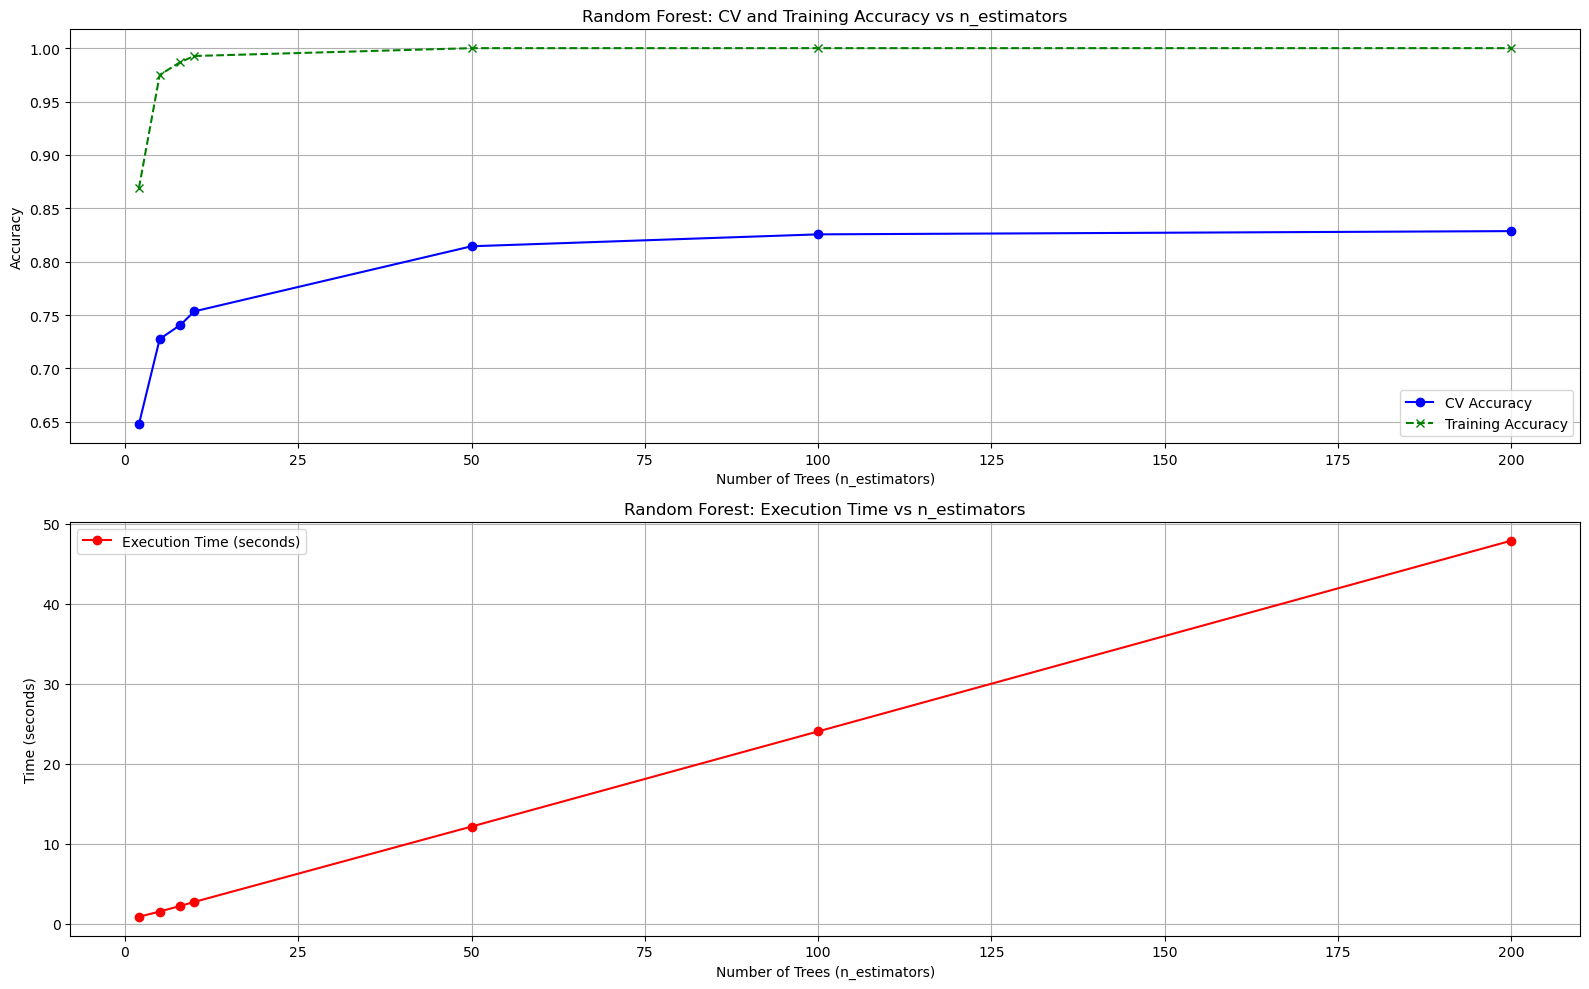

In [22]:
n_estimators = [2, 5, 8, 10, 50, 100, 200]
cv_accuracies = [results_rf[n]['avg_cv_accuracy'] for n in n_estimators]
train_accuracies = [results_rf[n]['avg_train_accuracy'] for n in n_estimators]
execution_times = [results_rf[n]['execution_time'] for n in n_estimators]


plt.figure(figsize=(16, 10))


plt.subplot(2, 1, 1)
plt.plot(n_estimators, cv_accuracies, marker='o', linestyle='-', color='b', label='CV Accuracy')
plt.plot(n_estimators, train_accuracies, marker='x', linestyle='--', color='g', label='Training Accuracy')
plt.title('Random Forest: CV and Training Accuracy vs n_estimators')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()


plt.subplot(2, 1, 2)
plt.plot(n_estimators, execution_times, marker='o', linestyle='-', color='r', label='Execution Time (seconds)')
plt.title('Random Forest: Execution Time vs n_estimators')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [25]:
max_depth_values = [2, 5, 7, 10, 20, 40]
results_rf_depth = {}


kf = KFold(n_splits=4, shuffle=True, random_state=42)


for depth in max_depth_values:
    avg_accuracies = []
    avg_train_accuracies = []
    
    start_time = time.time()
    
    for train_index, val_index in kf.split(X_train):
        X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
        y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]

        
        rf = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42)  
        rf.fit(X_fold_train, y_fold_train)

        y_val_pred = rf.predict(X_fold_val)
        accuracy = accuracy_score(y_fold_val, y_val_pred)
        avg_accuracies.append(accuracy)

        y_train_pred = rf.predict(X_fold_train)
        train_accuracy = accuracy_score(y_fold_train, y_train_pred)
        avg_train_accuracies.append(train_accuracy)

    avg_cv_accuracy = sum(avg_accuracies) / len(avg_accuracies)
    avg_train_accuracy = sum(avg_train_accuracies) / len(avg_train_accuracies)
    execution_time = time.time() - start_time

    results_rf_depth[depth] = {
        'avg_cv_accuracy': avg_cv_accuracy,
        'avg_train_accuracy': avg_train_accuracy,
        'execution_time': execution_time
    }

    print(f"Random Forest with max_depth={depth}: Average CV accuracy = {avg_cv_accuracy:.4f}, Average Training accuracy = {avg_train_accuracy:.4f}, Time taken = {execution_time:.2f} seconds")

Random Forest with max_depth=2: Average CV accuracy = 0.7704, Average Training accuracy = 0.7722, Time taken = 2.23 seconds
Random Forest with max_depth=5: Average CV accuracy = 0.7910, Average Training accuracy = 0.8038, Time taken = 3.98 seconds
Random Forest with max_depth=7: Average CV accuracy = 0.7984, Average Training accuracy = 0.8232, Time taken = 5.24 seconds
Random Forest with max_depth=10: Average CV accuracy = 0.8071, Average Training accuracy = 0.8578, Time taken = 7.40 seconds
Random Forest with max_depth=20: Average CV accuracy = 0.8169, Average Training accuracy = 0.9483, Time taken = 14.86 seconds
Random Forest with max_depth=40: Average CV accuracy = 0.8227, Average Training accuracy = 0.9965, Time taken = 22.57 seconds


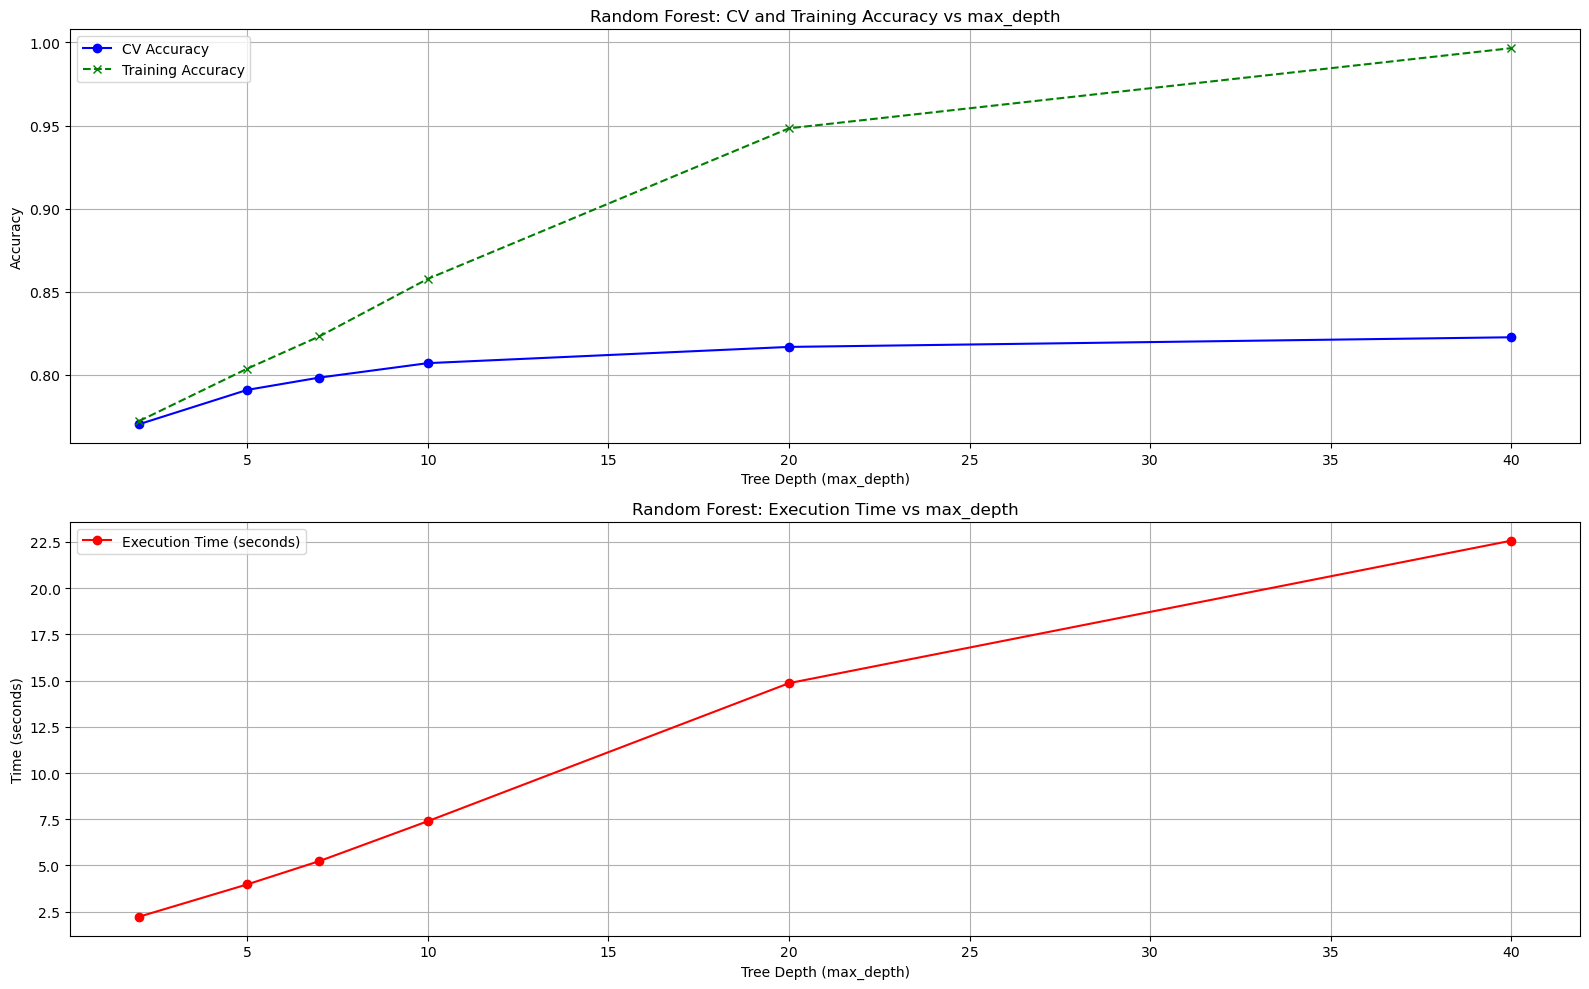

In [26]:

depth_values = [2, 5, 7, 10, 20, 40]
cv_accuracies = [results_rf_depth[depth]['avg_cv_accuracy'] for depth in depth_values]
train_accuracies = [results_rf_depth[depth]['avg_train_accuracy'] for depth in depth_values]
execution_times = [results_rf_depth[depth]['execution_time'] for depth in depth_values]


plt.figure(figsize=(16, 10))


plt.subplot(2, 1, 1)
plt.plot(depth_values, cv_accuracies, marker='o', linestyle='-', color='b', label='CV Accuracy')
plt.plot(depth_values, train_accuracies, marker='x', linestyle='--', color='g', label='Training Accuracy')
plt.title('Random Forest: CV and Training Accuracy vs max_depth')
plt.xlabel('Tree Depth (max_depth)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()


plt.subplot(2, 1, 2)
plt.plot(depth_values, execution_times, marker='o', linestyle='-', color='r', label='Execution Time (seconds)')
plt.title('Random Forest: Execution Time vs max_depth')
plt.xlabel('Tree Depth (max_depth)')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

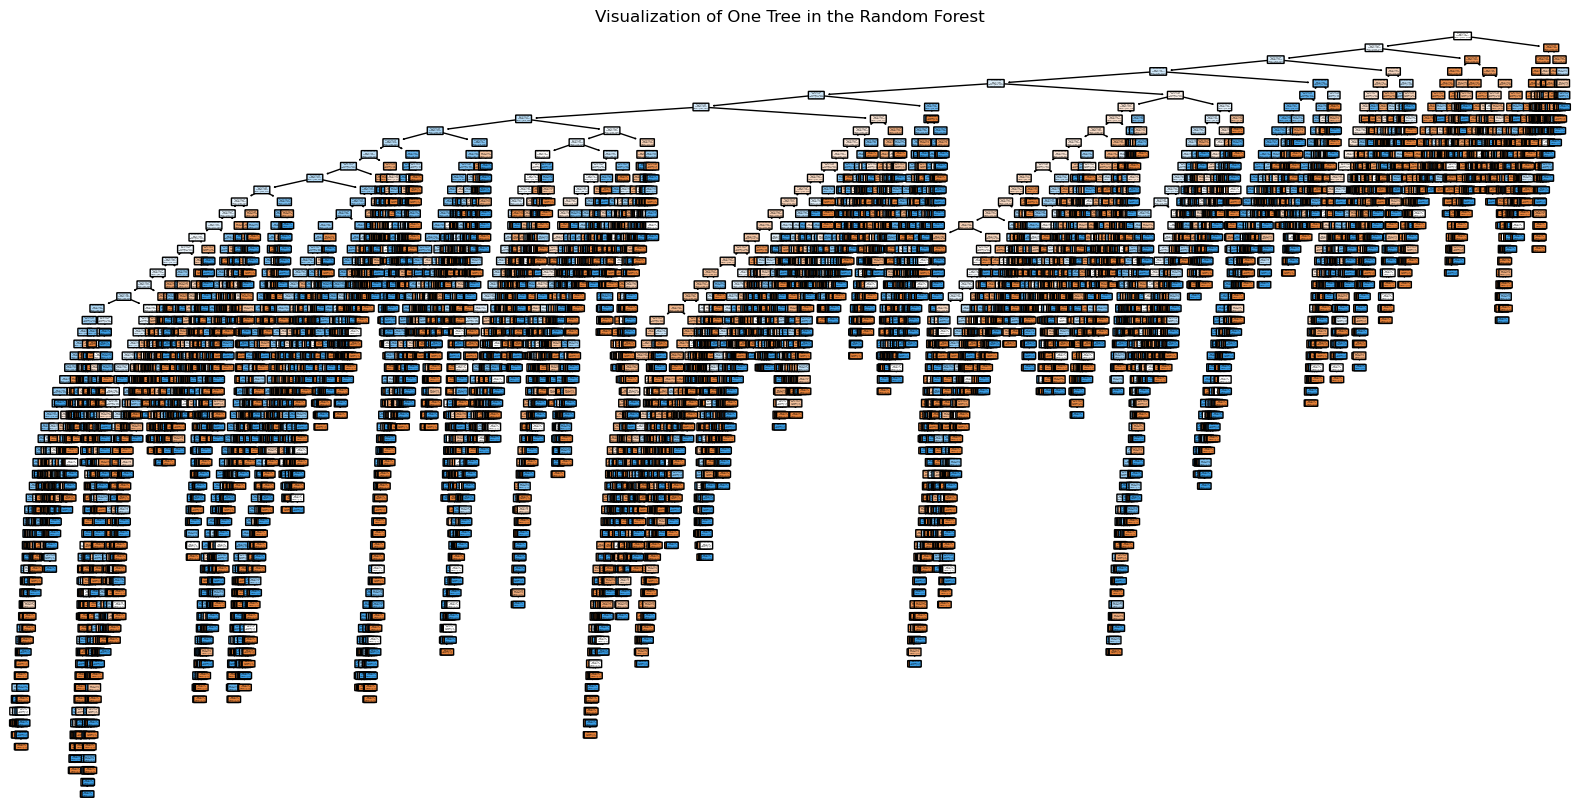

In [23]:
from sklearn.tree import plot_tree


rf = RandomForestClassifier(n_estimators=2, random_state=42)
rf.fit(X_train, y_train)


single_tree = rf.estimators_[0]  
plt.figure(figsize=(20, 10))
plot_tree(single_tree, filled=True, feature_names=X_train.columns, class_names=['Negative', 'Positive'], rounded=True)
plt.title('Visualization of One Tree in the Random Forest')
plt.show()

Gradient Boosted Regression Trees